In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/data.csv')
data.head()

,Dates of the year 2009,Reference value of\r\nT_{B} (K) at\r\n23.834GHz,Reference Value of\r\nT_{B} (K) at 30GHz,Precursor time of\r\nrain event (minutes)
0,14 Jan,70.26,30.80,35.58
1,15 Jan,68.15,30.25,36.18
2,16-17 Jan,72.23,33.58,38.65
3,17 Jan,73.04,31.75,36.49
4,18 Jan,68.80,30.43,38.05


In [3]:
data.shape

(52, 4)

In [4]:
newColumns = ['Date','T23.834GHz','T30GHz','raintime']
data.columns = newColumns
data.head()

,Date,T23.834GHz,T30GHz,raintime
0,14 Jan,70.26,30.80,35.58
1,15 Jan,68.15,30.25,36.18
2,16-17 Jan,72.23,33.58,38.65
3,17 Jan,73.04,31.75,36.49
4,18 Jan,68.80,30.43,38.05


In [5]:
data.dropna(inplace=True)
data.isna().sum()

Date          0
T23.834GHz    0
T30GHz        0
raintime      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        51 non-null     object 
 1   T23.834GHz  51 non-null     float64
 2   T30GHz      51 non-null     float64
 3   raintime    51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [7]:
data['T30GHz'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        51 non-null     object 
 1   T23.834GHz  51 non-null     float64
 2   T30GHz      51 non-null     float64
 3   raintime    51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [8]:
data.describe()

,T23.834GHz,T30GHz,raintime
count,51.000000,51.000000,51.000000
mean,65.675098,30.083333,37.839804
std,10.972433,6.916716,4.492920
min,39.910000,16.140000,29.960000
25%,54.850000,24.270000,35.880000
50%,70.660000,30.430000,38.560000
75%,73.785000,34.360000,40.610000
max,81.110000,46.790000,47.200000


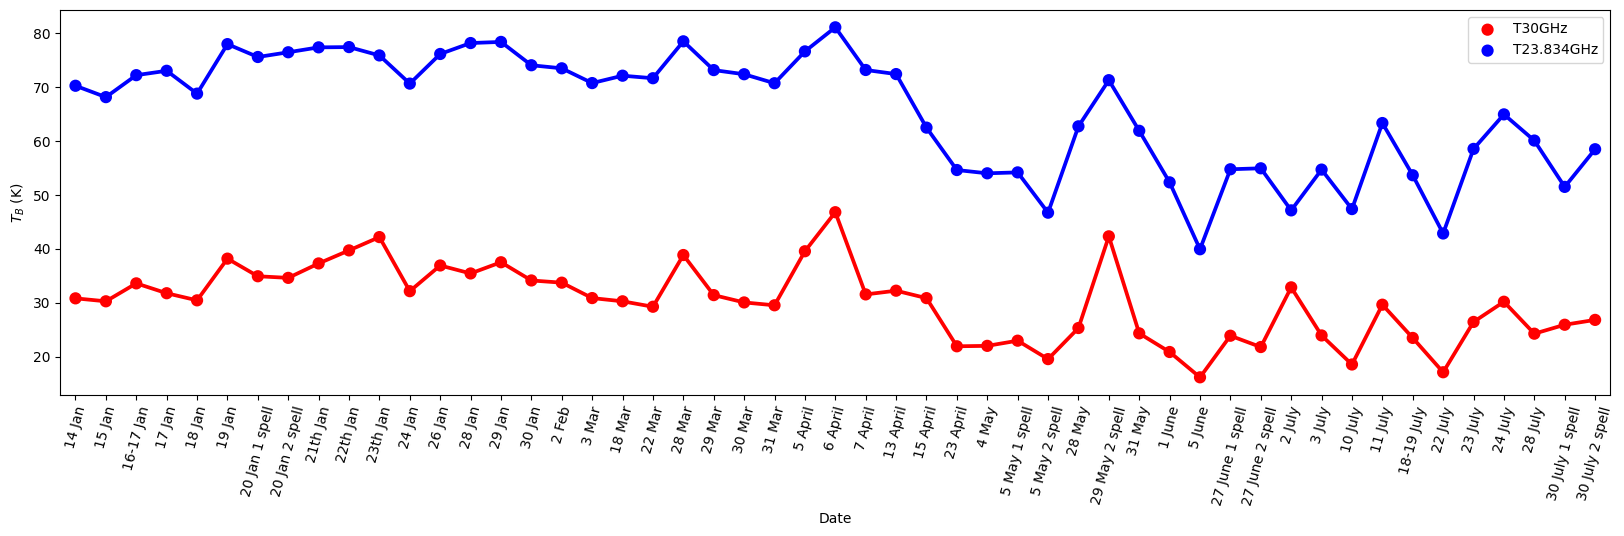

In [9]:
plt.figure(figsize=(20,5))
sns.pointplot(x='Date',y='T30GHz',data=data,color='red',label='T30GHz')
sns.pointplot(x='Date',y='T23.834GHz',data=data,color='blue',label='T23.834GHz')
plt.legend()
plt.xlabel('Date')
plt.ylabel(r'$T_B$ (K)')
plt.xticks(rotation=75)
plt.savefig('plots/TvsDate.png',dpi=450)
plt.show()

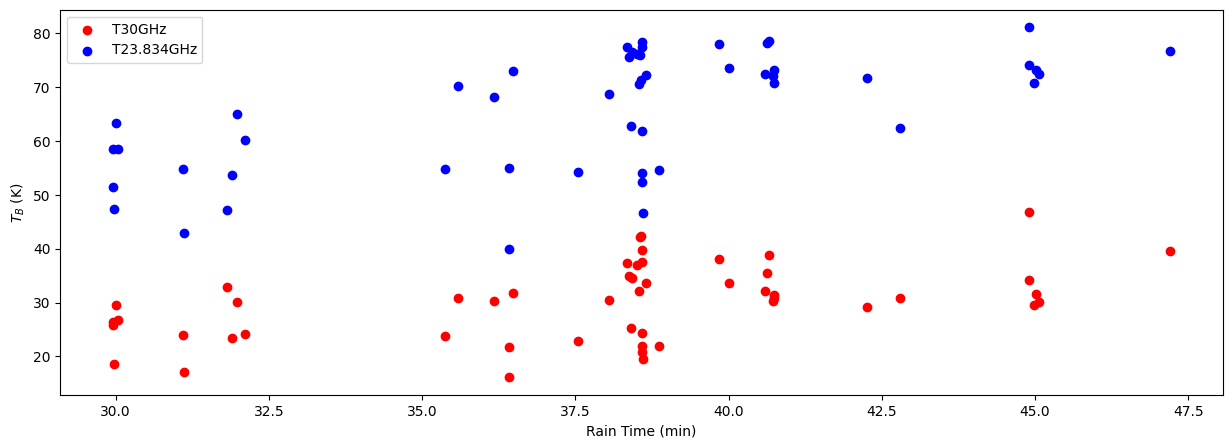

In [10]:
plt.figure(figsize=(15,5))
plt.scatter(
    data['raintime'],
    data['T30GHz'],
    color='red',
    label='T30GHz'
)
plt.scatter(
    data['raintime'],
    data['T23.834GHz'],
    color='blue',
    label='T23.834GHz'
)
plt.xlabel('Rain Time (min)')
plt.ylabel(r'$T_B$ (K)')
plt.legend()
plt.savefig('plots/TvsRainTime.png',dpi=450)
plt.show()

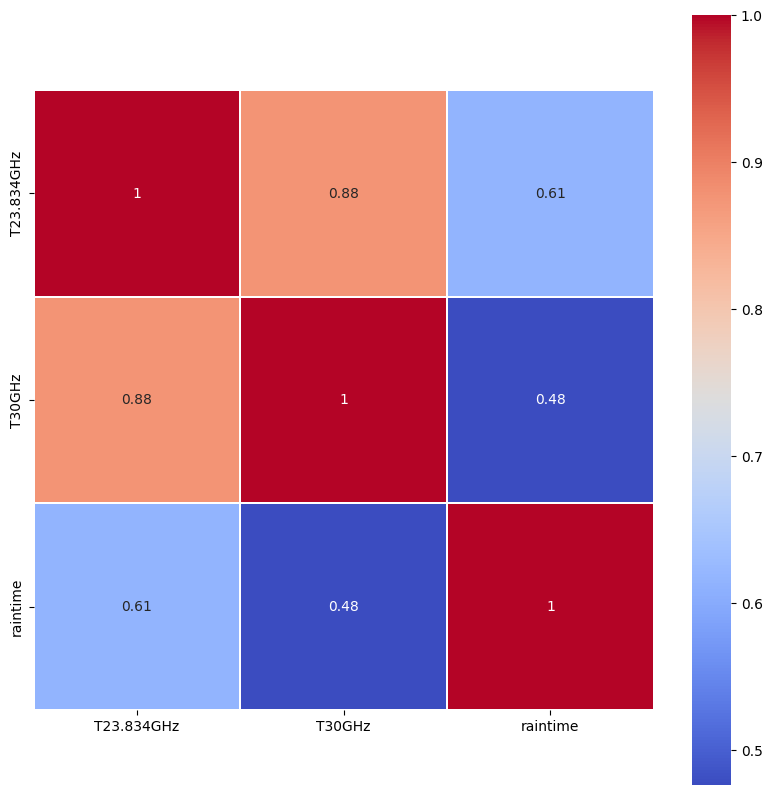

In [11]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.2,
    annot_kws={'size':10},
    square=True
)
plt.savefig('plots/Correlation.png',dpi=450)
plt.show()

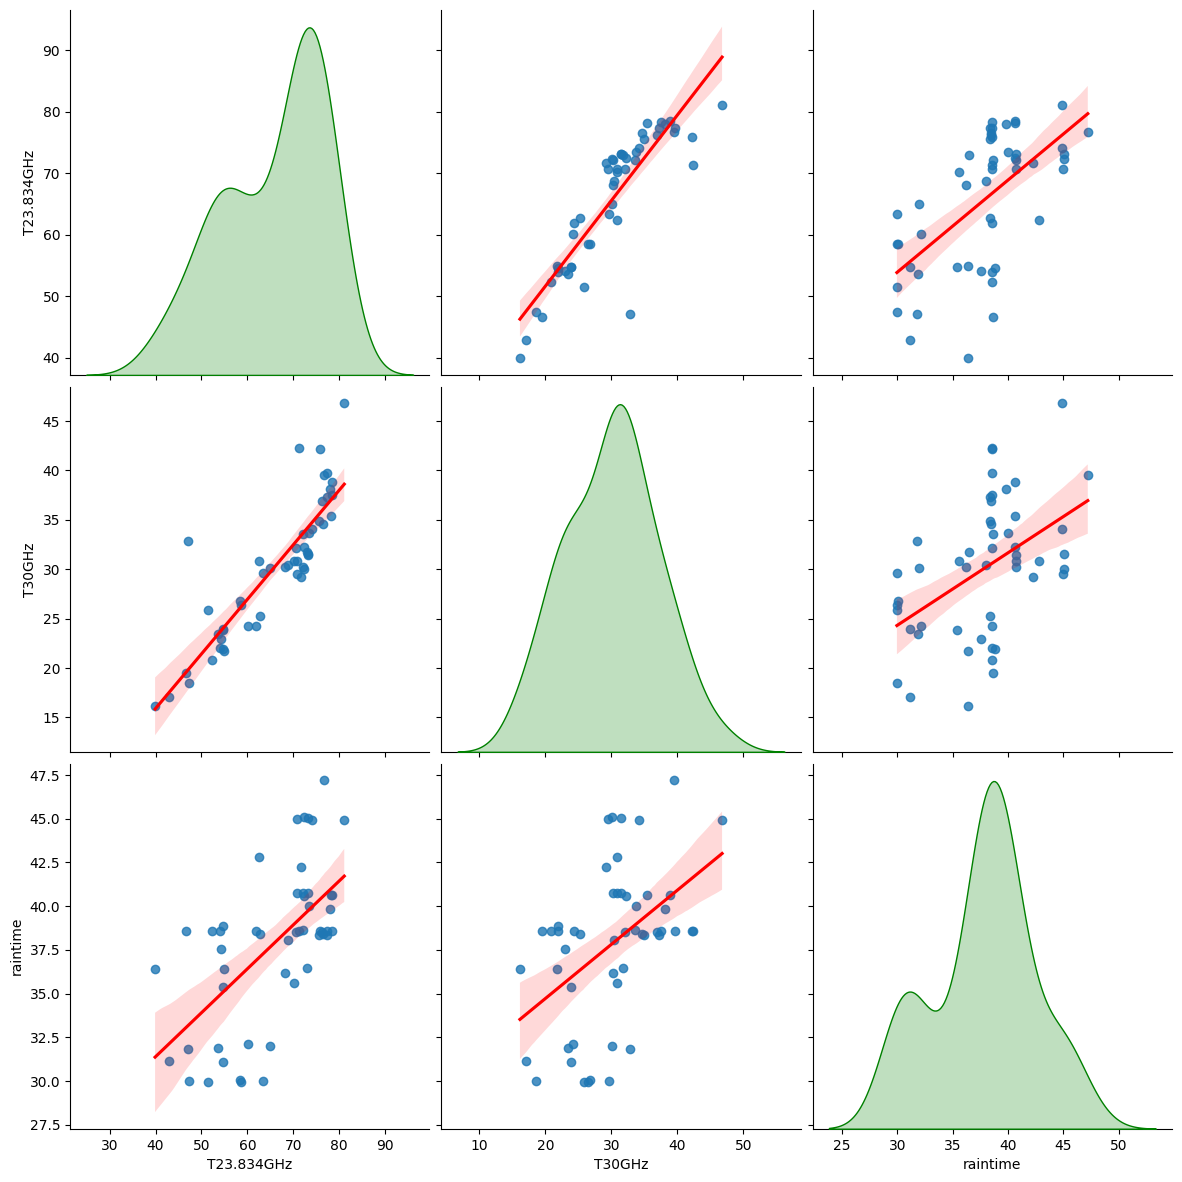

In [12]:
sns.pairplot(
    data,
    kind='reg',
    diag_kind='kde',
    plot_kws={'line_kws':{'color':'red'}},
    diag_kws={'color':'green'},
    height=4
)
plt.savefig('plots/PairPlot.png',dpi=450)
plt.show()

In [13]:
xTrain = data[['T23.834GHz','T30GHz']].values
yTrain = data['raintime']

In [14]:
from sklearn.linear_model import LinearRegression

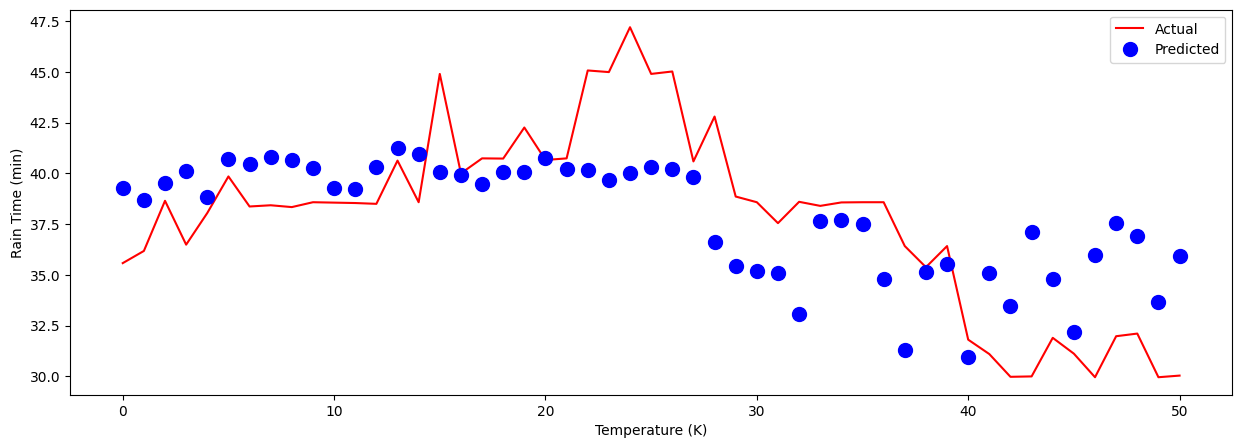

In [15]:
linearModel = LinearRegression()
linearModel.fit(xTrain,yTrain)
linearPrediction = linearModel.predict(xTrain)
plt.figure(figsize=(15,5))
plt.plot(yTrain,color='red',label='Actual')
plt.plot(linearPrediction,'o',label='Predicted',color='blue',markersize=10)
plt.xlabel('Temperature (K)')
plt.ylabel('Rain Time (min)')
plt.legend()
plt.savefig('plots/LinearRegression.png',dpi=450)
plt.show()

In [16]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Epoch 1/600
2/2 [==============================] - 1s 193ms/step - loss: 177.0259 - val_loss: 44.6681
Epoch 2/600
2/2 [==============================] - 0s 37ms/step - loss: 72.4709 - val_loss: 18.1105
Epoch 3/600
2/2 [==============================] - 0s 55ms/step - loss: 29.0337 - val_loss: 21.7240
Epoch 4/600
2/2 [==============================] - 0s 63ms/step - loss: 32.2517 - val_loss: 34.1477
Epoch 5/600
2/2 [==============================] - 0s 51ms/step - loss: 43.8015 - val_loss: 35.8555
Epoch 6/600
2/2 [==============================] - 0s 70ms/step - loss: 45.0311 - val_loss: 29.5167
Epoch 7/600
2/2 [==============================] - 0s 76ms/step - loss: 36.2010 - val_loss: 21.5341
Epoch 8/600
2/2 [==============================] - 0s 66ms/step - loss: 28.9488 - val_loss: 16.8719
Epoch 9/600
2/2 [==============================] - 0s 56ms/step - loss: 24.4117 - val_loss: 16.0464
Epoch 10/600
2/2 [==============================] - 0s 49ms/step - loss: 26.1540 - val_loss: 16.81

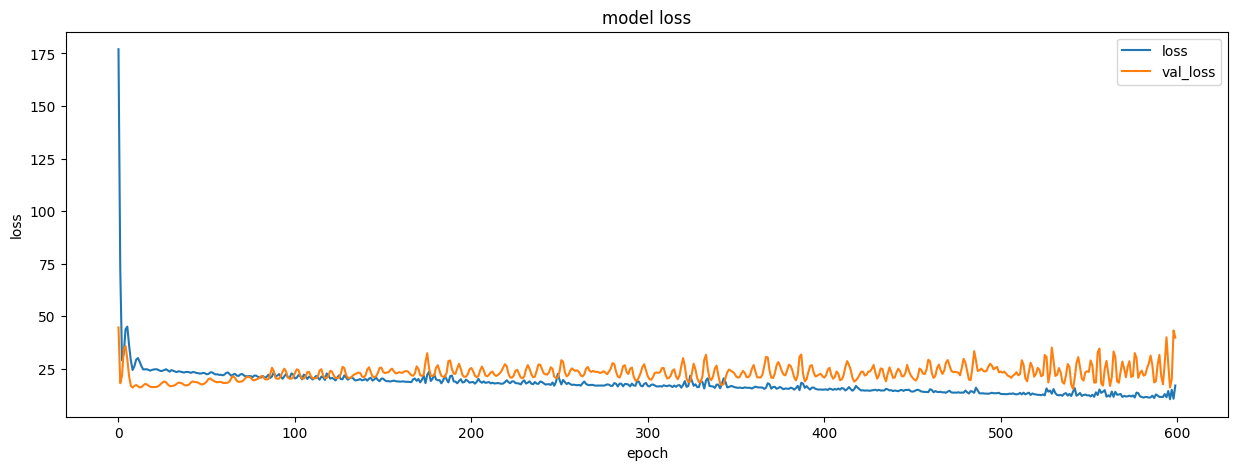

2/2 [==============================] - 0s 2ms/step


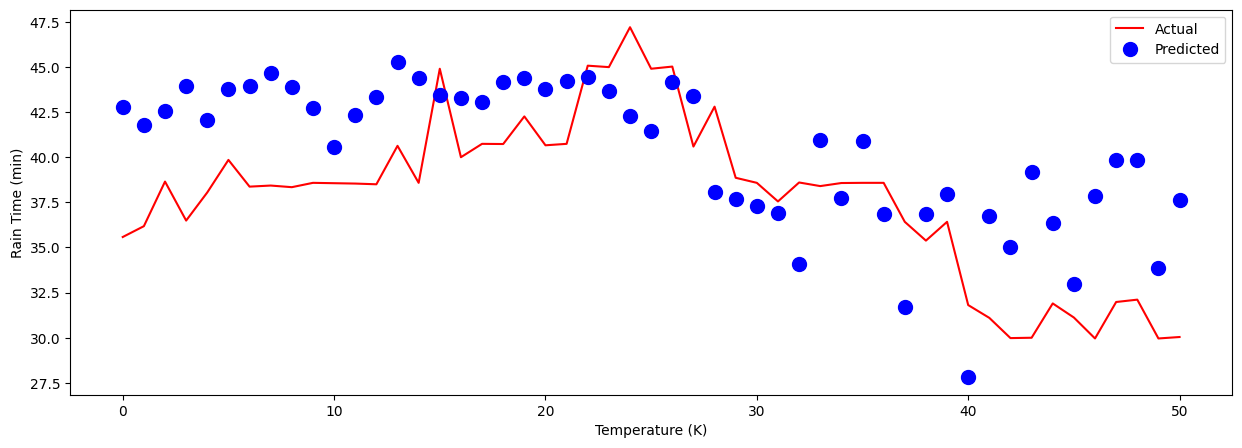

In [27]:
neuralModel = Sequential([
        Dense(2,activation='linear',input_shape=(2,)),
        Dense(1,activation='relu')
    ]
)
neuralModel.compile(
    optimizer=Adam(learning_rate=0.02),
    loss='mean_squared_error'
)
neuralHistory = neuralModel.fit(
    xTrain,
    yTrain,
    epochs=600,
    batch_size=32,
    validation_split=0.2
)
plt.figure(figsize=(15,5))
plt.plot(neuralHistory.history['loss'],label='loss')
plt.plot(neuralHistory.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('plots/NeuralLoss.png',dpi=450)
plt.show()
neuralPrediction = neuralModel.predict(xTrain)
plt.figure(figsize=(15,5))
plt.plot(yTrain,label='Actual',color='red',markersize=10)
plt.plot(neuralPrediction,'o',label='Predicted',color='blue',markersize=10)
plt.xlabel('Temperature (K)')
plt.ylabel('Rain Time (min)')
plt.legend()
plt.savefig('plots/NeuralRegression.png',dpi=450)
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor

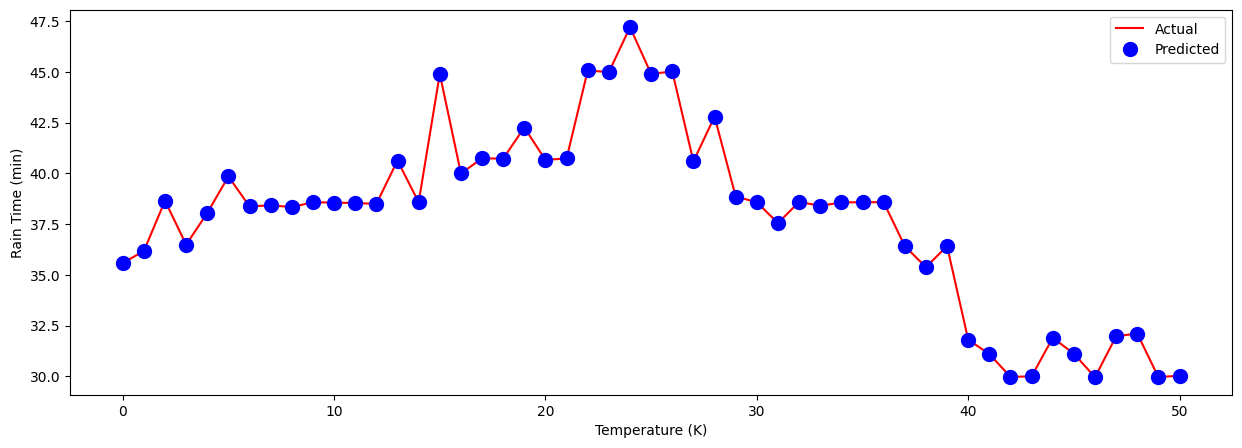

In [29]:
decisionModel = DecisionTreeRegressor()
decisionModel.fit(xTrain,yTrain)
decisionPrediction = decisionModel.predict(xTrain)
plt.figure(figsize=(15,5))
plt.plot(yTrain,label='Actual',color='red',markersize=10)
plt.plot(decisionPrediction,'o',label='Predicted',color='blue',markersize=10)
plt.xlabel('Temperature (K)')
plt.ylabel('Rain Time (min)')
plt.legend()
plt.savefig('plots/DecisionRegression.png',dpi=450)
plt.show()

In [30]:
import modelbit
mb = modelbit.login()

In [31]:
mb.deploy(
    decisionModel,
    'DecisionTreeRegression',
    python_version='3.11',
    python_packages=["scikit-learn==1.2.2"]
)

Uploading 'DecisionTreeRegression': 2.24kB [00:01, 1.81kB/s]                   


In [32]:
import requests

In [33]:
url = 'https://rajsahu.app.modelbit.com/v1/DecisionTreeRegression/latest'
T23_834Ghz = 25
T30Ghz = 35
query = {"data": [T23_834Ghz,T30Ghz]}
r = requests.post(url, json=query)
value = r.json()['data']
print(f'{value} Rain Time (min)')

31.81 Rain Time (min)
